In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [33]:
wcols = """duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate,
label"""

In [34]:
cols=[]
for c in wcols.split(','):
    if(c.strip()):
       cols.append(c.strip())
print(len(cols))

42


In [35]:
data = pd.read_csv(".\\kddcup.data_10_percent_corrected", names=cols)
# print(data)

In [36]:
attack = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [37]:
result = {
'normal': 'No',
'back': 'Yes',
'buffer_overflow': 'Yes',
'buffer_overflow': 'Yes',
'ftp_write': 'Yes',
'guess_passwd': 'Yes',
'imap': 'Yes',
'ipsweep': 'Yes',
'land': 'Yes',
'loadmodule': 'Yes',
'multihop': 'Yes',
'neptune': 'Yes',
'nmap': 'Yes',
'perl': 'Yes',
'phf': 'Yes',
'pod': 'Yes',
'portsweep': 'Yes',
'rootkit': 'Yes',
'satan': 'Yes',
'smurf': 'Yes',
'spy': 'Yes',
'teardrop': 'Yes',
'warezclient': 'Yes',
'warezmaster': 'Yes',
}

In [38]:
path = ".\\kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=cols)

df['Attack_Type'] = df.label.apply(lambda r:attack[r[:-1]])
df['State'] = df.label.apply(lambda r:result[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,Attack_Type,State
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal,No
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal,No
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal,No
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal,No
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal,No


In [39]:
df.shape

(494021, 44)

In [40]:
df['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [41]:
df['Attack_Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack_Type, dtype: int64

In [42]:
df['State'].value_counts()

Yes    396743
No      97278
Name: State, dtype: int64

In [43]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [44]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [45]:
num_cols = df._get_numeric_data().columns
print(num_cols)
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('label')
cate_cols.remove('Attack_Type')
cate_cols.remove('State')
print(cate_cols)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
['protocol_type', 'service', 'flag']


In [46]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

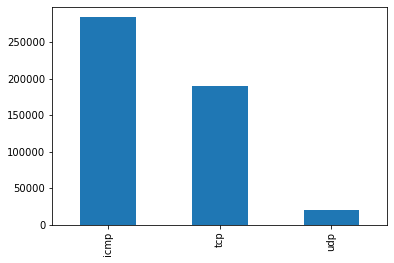

In [47]:
bar_graph('protocol_type')

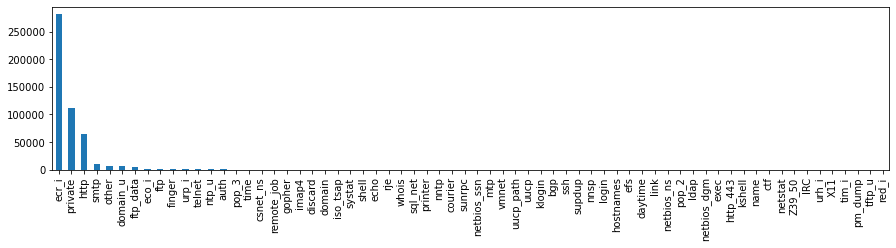

In [48]:
plt.figure(figsize=(15,3))
bar_graph('service')

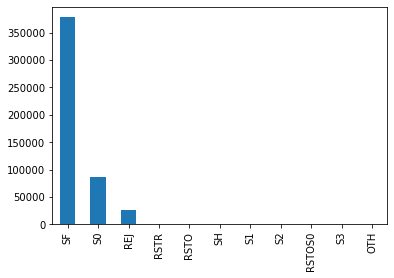

In [49]:
bar_graph('flag')

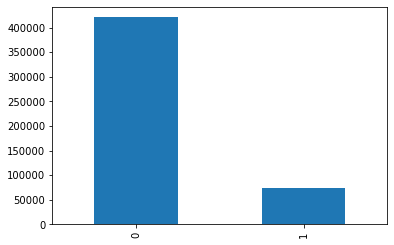

In [50]:
bar_graph('logged_in')

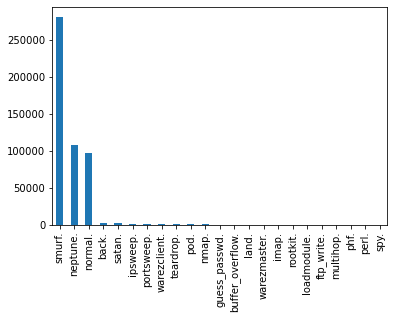

In [51]:
bar_graph('label')

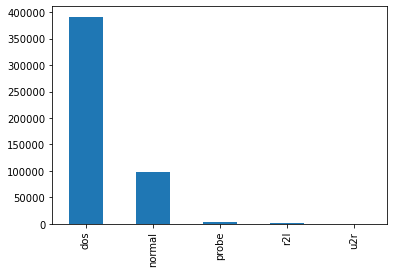

In [52]:
bar_graph('Attack_Type')

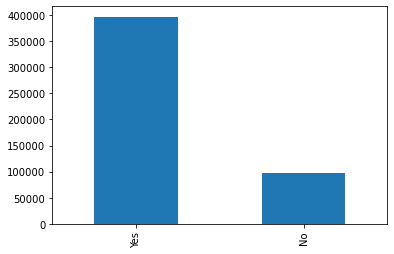

In [53]:
bar_graph('State')

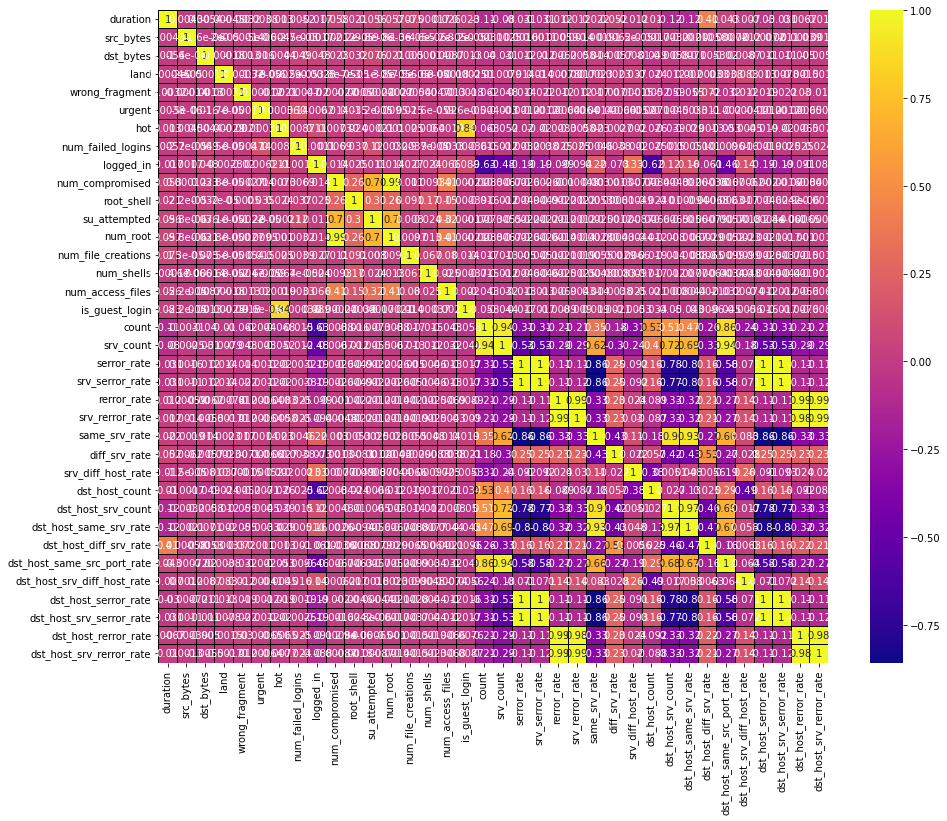

In [54]:
# df = df.dropna('cols')
# df = df[[col for col in df if df[col].nunique() > 1]]
# -----------------------------------------------------------
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
# ------------------------------------------------------------
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='plasma', annot=True, cbar=True, linewidths=1, linecolor='black')
plt.show()

In [55]:
df['num_root'].corr(df['num_compromised'])

0.9938277978738366

In [56]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725952

In [57]:
df['srv_count'].corr(df['count'])

0.9436670688882655

In [58]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539817937

In [59]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953983

In [60]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373309

In [61]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110298

In [62]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691242

In [63]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324209

In [64]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783333

In [65]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105015

In [66]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373975

In [67]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485680104

In [68]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850098

In [69]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956001

In [70]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308375

In [71]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751249

In [72]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845669

In [73]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [74]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label,Attack_Type,State
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal,No
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal,No
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal,No
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal,No
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal,No


In [75]:
df.shape

(494021, 34)

In [76]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'label',
       'Attack_Type', 'State'],
      dtype='object')

In [77]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
print(df_std)

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

C:\Users\bisha\AppData\Local\Temp\ipykernel_17992\2233665817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = df.std()


In [78]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [79]:
print(df['protocol_type'])

0         tcp
1         tcp
2         tcp
3         tcp
4         tcp
         ... 
494016    tcp
494017    tcp
494018    tcp
494019    tcp
494020    tcp
Name: protocol_type, Length: 494021, dtype: object


In [80]:
promap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(promap)
print(df['protocol_type'])

0         1
1         1
2         1
3         1
4         1
         ..
494016    1
494017    1
494018    1
494019    1
494020    1
Name: protocol_type, Length: 494021, dtype: int64


In [81]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [82]:
print(df['flag'])

0         SF
1         SF
2         SF
3         SF
4         SF
          ..
494016    SF
494017    SF
494018    SF
494019    SF
494020    SF
Name: flag, Length: 494021, dtype: object


In [83]:
flag_map = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(flag_map)
print(df['flag'])

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: flag, Length: 494021, dtype: int64


In [84]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label,Attack_Type,State
0,0,1,http,0,181,5450,0,0,0,0,...,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal,No
1,0,1,http,0,239,486,0,0,0,0,...,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal,No
2,0,1,http,0,235,1337,0,0,0,0,...,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal,No
3,0,1,http,0,219,1337,0,0,0,0,...,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal,No
4,0,1,http,0,217,2032,0,0,0,0,...,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal,No


In [85]:
df.drop('service',axis = 1,inplace= True)

In [86]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label,Attack_Type,State
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal,No
1,0,1,0,239,486,0,0,0,0,0,...,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal,No
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal,No
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal,No
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal,No


In [87]:
print(df.shape)

(494021, 33)


In [88]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [92]:
df = df.drop(['label',], axis='columns')

In [89]:
df = df.drop(['State',], axis='columns')
# prev line is executed early and label column is deleted
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'label',
       'Attack_Type'],
      dtype='object')

In [129]:
df.shape

(494021, 31)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Target variable and train set
Y = df[['Attack_Type']]
X = df.drop(['Attack_Type'], axis=1)


sc = MinMaxScaler()
X = sc.fit_transform(X)

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [ ]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
start_time = time.time()
print(X_train)
print(Y_train.values.ravel())
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [123]:
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Training time:  0.5782220363616943
Testing time:  0.390852689743042
Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [111]:
# arr = np.array([Y_train.values.ravel()])
# from sklearn.metrics import accuracy_score
# accuracy_score(arr,Y_test_pred1)

In [125]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Training time:  1.3893539905548096
Testing time:  0.031040430068969727
Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


In [140]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Training time:  14.891138792037964
Testing time:  0.8533275127410889
Train score is: 0.99997583037759
Test score is: 0.9996564986167935


In [141]:
# SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
model4 = SVC(gamma = 'scale')

In [142]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  199.82579946517944


In [144]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  106.19707131385803


In [146]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


In [147]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(max_iter=1200000)

In [148]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  29.820022344589233


In [149]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.03996539115905762


In [150]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


<BarContainer object of 5 artists>

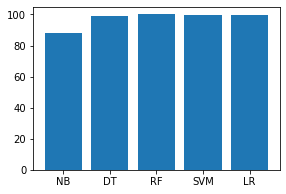

In [151]:
# TRAINING ACCURACY
names = ['NB', 'DT', 'RF', 'SVM', 'LR']
values = [87.951, 99.058, 99.997, 99.875, 99.352]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

In [ ]:
# f.savefig('training_accuracy_figure.png',bbox_inches='tight')

<BarContainer object of 5 artists>

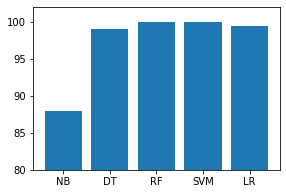

In [152]:
# TESTING ACCURACY
names = ['NB','DT','RF','SVM','LR']
values = [87.903,99.052,99.969,99.879,99.352]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

<BarContainer object of 5 artists>

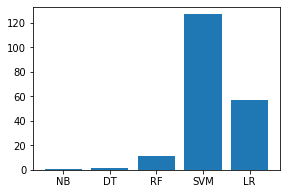

In [153]:
# TRAINING TIME
names = ['NB','DT','RF','SVM','LR']
values = [1.04721,1.50483,11.45332,126.96016,56.67286]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

<BarContainer object of 5 artists>

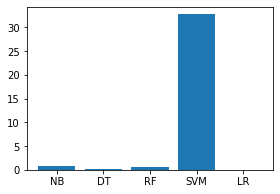

In [154]:
# TESTING TIME
names = ['NB','DT','RF','SVM','LR']
values = [0.79089,0.10471,0.60961,32.72654,0.02198]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)